In [1]:
import os
os.chdir("..")
os.getcwd()

'C:\\Users\\Jerem\\Documents\\UMICH\\Research\\realsense-tracking'

In [2]:
try:
   import cPickle as pickle
except:
   import pickle
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import shapely
import numpy as np
from landing.helper.o3d_util import create_linemesh_from_shapely, get_segments, _MeshTransmissionFormat, plot_polygons
from pathlib import Path
%matplotlib notebook  

## Plot Extracted Polygons

In [25]:
def flip_columns(array):
    array[:, [1, 0]] = array[:, [0, 1]]
    return array
def flip_xy(polygon):
    exterior = flip_columns(np.array(polygon.exterior))
    holes = []
    for hole in polygon.interiors:
        holes.append(flip_columns(np.array(hole)))
    poly = Polygon(shell=exterior, holes=holes)
    return poly

In [13]:
data_dir = Path("assets/data")
saved = data_dir / "sp_1.pkl"
saved = [data_dir / f"sp_{i+1}.pkl" for i in range(2)]
data = [pickle.load(open(save, 'rb')) for save in saved]
for dat in data:
    dat['mesh'] = dat['mesh'].create_mesh()


In [26]:
work_space = box(-1.75, -2, 1.75, 2)
small_box = box(0, 0,0.158, 0.254)
small_box = shapely.affinity.translate(small_box, xoff=1.21, yoff=1.0)

phantom_box = box(0, 0,0.362, 0.387)
phantom_box = shapely.affinity.translate(phantom_box, xoff=-1.15, yoff=.72)

medium_box = box(0, 0,.24, .42)
medium_box = shapely.affinity.translate(medium_box, xoff=-1.1, yoff=-.889)

ladder = box(0, 0, .43, .66)
ladder = shapely.affinity.translate(ladder, xoff=.1, yoff=.5)
ladder = shapely.affinity.rotate(ladder, angle=65, origin='centroid')

work_space_holes = work_space.difference(small_box).difference(phantom_box).difference(medium_box).difference(ladder)

data[0]['polygon_clipped'] = data[0]['polygon'].intersection(work_space)
data[1]['polygon_clipped'] = data[1]['polygon'].intersection(work_space)

In [44]:
def adjust_axes(ax):
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlabel("Y")
    ax.set_ylabel("X")
    ax.invert_yaxis()
    ax.invert_xaxis()

<IPython.core.display.Javascript object>


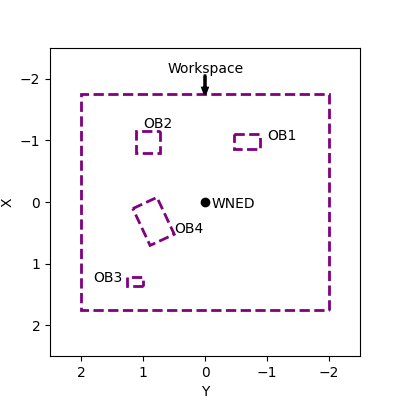

In [80]:

fig, ax = plt.subplots(1,1, figsize=(4,4))
# plot_polygons([data[0]['polygon_clipped']], ax)
# plot_polygons([data[1]['polygon_clipped']], ax, shell_color='red', hole_color='red')
plot_polygons([flip_xy(work_space_holes)],ax, shell_color='purple', hole_color='purple', linestyle='dashed')
adjust_axes(ax)
ax.scatter(0,0, c='k')
ax.text(-0.1,0.1, "WNED")
ax.text(-1, -1, "OB1")
ax.text(1, -1.2, "OB2")
ax.text(1.8, 1.3, "OB3")
ax.text(0.5, 0.5, "OB4")
ax.text(0.6, -2.1, "Workspace")
ax.arrow(0, -2.05, 0, 0.2, head_width=0.075, head_length=0.1, fc='k', ec='k', linewidth=2.0)
plt.savefig("assets/images/workspace_plot.pdf", bbox_inches='tight')